In [266]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [250]:
#reads images to matrix 
def readTrainingImages():
    
    mat = np.zeros((2400,784))
    for x in range(1,2400):
        image = plt.imread('/Users/heba/Desktop/ML/Assignment 3/Images/'+ str(x) +'.jpg')
        array = np.array(image)
        flatarray = array.flatten()
        mat[x,:] = np.array(flatarray)
    return mat

In [251]:
Xmatrix = readTrainingImages() #This would be the X matrix each row is an image (2400x785)
Xmatrix.sum()

65307601.0

In [252]:
#Binarization of the input images with a threshold of 140
for i in range(2400):
    for j in range(784):
        if(Xmatrix[i][j] >140):
            Xmatrix[i][j] = 1
        else:
            Xmatrix[i][j] = 0     

In [253]:
Xmatrix.shape

(2400, 784)

In [254]:
#Given a images matrixm and a centerm returns a new center and a new images matrix without the image of the prev center, and the new center is the image furthest from the inputted center
def initializeClusterCenters(Xmatrixleft, prevcenter):
    
    #initialize center image as a 1D array of zeros
    center = np.zeros((1,784)).flatten() 
    
    #loop on Xmatrix to find maximum euclidien distance
    sP = Xmatrixleft
    pA = prevcenter
    distances = np.linalg.norm(sP - pA, ord=2, axis=1.)

    center = Xmatrixleft[distances.argmax()]
    Xmatrixnew = np.delete(Xmatrixleft, (distances.argmax()), axis=0)
    
    return [Xmatrixnew, center]
    

In [256]:
#Given an images matrix, randomly selects an image to be first center then loops to find the 9 other centers by using the prev method
def initializeClusters(Xmatrix):
    
    matCenters = np.zeros((10,784)) #initialize centers matrix
    
    index = np.random.randint(low=0, high=2399)
    
    center0 = Xmatrix[index] #first center
    matCenters[0] = np.array(center0)
    
    Xmatrix = np.delete(Xmatrix, (index), axis=0) #new img matrix without first center
    
    for k in range(1,10):
        output = initializeClusterCenters(Xmatrix, center0) 
        Xmatrix = output[0]
        center1 = output[1]
        
        matCenters[k] = np.array(center1)
        center0 = center1
        
    return matCenters     

In [258]:
#Given a centers matrix, and an images vector, outputs the membership cluster value for each image of the 2400 according to euclidien distances to the centers
def membership(matCenters, Xmatrix):
    
    members = np.zeros((1,2400)).flatten() 
    
    for x in range(2400):
        
        sP = matCenters
        pA = Xmatrix[x]
        distances = np.linalg.norm(sP - pA, ord=2, axis=1.)
        
        minIndex = distances.argmin()
        
        members[x] = minIndex
        
    return members      

In [261]:
#array that will store the membership vectors for each iteration
thirtyMembers = np.ones((1,2400)) #initialized with row of 1s will be deleted later

for i in range(30): 
   
    matCenters = initializeClusters(Xmatrix)
    members = membership(matCenters, Xmatrix)
    oldmembers = np.copy(members)
    oldmatCenters = np.copy(matCenters)

    while(True):

        #Update centroids with K-means
        for k in range(10):

            mean = np.zeros((1,784))  #new center for cluster k

            XCluster = Xmatrix[np.where(members==k)]
            
            mean = np.mean(XCluster, axis = 0) #compute mean of images members in cluster k     
            matCenters[k] = mean #new center for cluster k

        #After updating the 10 centroids, we recalculate the membership values and compare it
        #with old membership values, if they're the same, we break and this converges

        members = membership(matCenters, Xmatrix)
        if(np.array_equal(matCenters,oldmatCenters)):
            break
        else:
            oldmatCenters = np.copy(matCenters)
            
    #after converging, add the members to the thirty members matrix
    thirtyMembers = np.vstack([thirtyMembers, members])

    

#After finishing the loop 30 times, we remove the redundant row of 1s
thirtyMembers = np.delete(thirtyMembers, (0), axis=0)

In [269]:
#np.set_printoptions(threshold=np.inf)
thirtyMembers.shape

(30, 2400)

In [288]:
#Given a membership vector, calculates the within cluster distance with respect to the Xmatrix of images, and the clustering that took place according to the values of membership
def withinClusterDistance(members):
    distance = 0
    
    for k in range(10):
        
        XCluster = Xmatrix[np.where(members==k)] #images in the cluster k
        
        for x in range(XCluster.shape[0]):
            sP = XCluster[x]
            pA = XCluster
            #distances of image x and all other images in XCluster
            distances = np.linalg.norm(sP - pA, ord=2, axis=1.)
            
            #add those distances to the output distance
            distance = distance + distances.sum()
    
    return distance

In [292]:
#Finding the minimum within clustering distance for all the 30 iterations 
#initializing mindistance to first initialization distance
minDistance = withinClusterDistance(thirtyMembers[0])
index = 0

for i in range(1,30):
    
    distancei = withinClusterDistance(thirtyMembers[i])
    if(distancei < minDistance):
        #if initilization i had smaller within cluster distance then it's better
        minDistance = distancei
        index = i
        
        
bestInitilizationIndex = index

In [293]:
bestMembers = thirtyMembers[bestInitilizationIndex]
bestInitilizationIndex
#This is the best initialization index that provided the most accurate membership vector to be used

4

In [308]:
bestMembers[0:240] #For digit 0

array([0., 9., 9., 6., 9., 9., 9., 9., 8., 9., 9., 6., 9., 9., 8., 9., 9.,
       9., 9., 9., 6., 9., 9., 9., 8., 8., 9., 1., 9., 8., 9., 4., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 4., 1., 9., 8., 9., 4., 9., 4., 9., 1., 9., 1., 4., 8.,
       9., 9., 9., 9., 6., 9., 9., 9., 1., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 4., 4., 9., 4., 9., 8., 4., 4., 4., 8., 4., 8., 4., 9., 8.,
       4., 9., 5., 9., 8., 9., 9., 9., 8., 9., 8., 6., 9., 0., 9., 9., 9.,
       6., 9., 9., 4., 6., 6., 9., 9., 9., 9., 9., 6., 9., 6., 9., 4., 9.,
       8., 9., 9., 9., 9., 9., 9., 0., 9., 9., 9., 9., 9., 8., 9., 8., 9.,
       9., 9., 9., 9., 9., 9., 8., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       8., 9., 9., 9., 9., 9., 9., 9., 5., 9., 9., 5., 9., 5., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 1., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 1., 9., 8., 9., 9., 9., 9., 1., 9., 8., 9., 9., 9.,
       8., 5., 9., 9., 9.

In [358]:
#Initializing count vector to all 1s each row corresponds to count of digits (0-9)
count = np.ones((10,1))
imageIndex = 0
for x in range(10):
    
    (_, idx, counts) = np.unique(bestMembers[imageIndex:imageIndex+240], return_index=True, return_counts=True)
    index = idx[np.argmax(counts)]
    mode = bestMembers[imageIndex:imageIndex+240][index]
    print("Mode of " + str(x) +" is " + str(mode))
    print("The first index it appeared in is " + str(index))
    print("The count of this mode is " + str(np.max(counts)))
    print("")
    count[x] = np.max(counts)
    imageIndex = imageIndex + 240
    
print(count)

Mode of 0 is 9.0
The first index it appeared in is 1
The count of this mode is 173

Mode of 1 is 0.0
The first index it appeared in is 1
The count of this mode is 235

Mode of 2 is 3.0
The first index it appeared in is 1
The count of this mode is 142

Mode of 3 is 8.0
The first index it appeared in is 3
The count of this mode is 100

Mode of 4 is 7.0
The first index it appeared in is 4
The count of this mode is 104

Mode of 5 is 4.0
The first index it appeared in is 2
The count of this mode is 78

Mode of 6 is 1.0
The first index it appeared in is 1
The count of this mode is 182

Mode of 7 is 2.0
The first index it appeared in is 1
The count of this mode is 155

Mode of 8 is 6.0
The first index it appeared in is 1
The count of this mode is 112

Mode of 9 is 7.0
The first index it appeared in is 1
The count of this mode is 120

[[173.]
 [235.]
 [142.]
 [100.]
 [104.]
 [ 78.]
 [182.]
 [155.]
 [112.]
 [120.]]


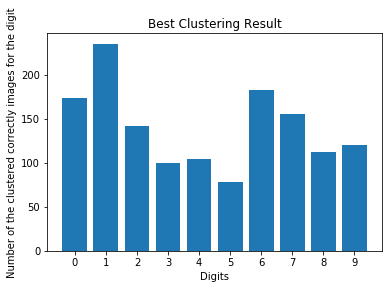

In [380]:
plt.bar(('0','1','2','3','4','5','6','7','8','9'),count.flatten())
plt.title("Best Clustering Result")
plt.xlabel("Digits")
plt.ylabel("Number of the clustered correctly images for the digit")
plt.savefig('Counts.jpg',bbox_inches='tight')